# Movimento Circular

Na simulação temos um obejto em movimento circular uniforme.
Temo portanto $\frac{d\theta}{dt} = W$.
Na simulação assumimos que o raio de curvatura é de 1 metro, com velocidade angular de 10 rad/s e o intervalo de 0.01 segundos.

#### Solução analítica
$\theta(t)=wt+\theta_0$

$x(t)=raio \cdot cos(\theta)$

$y(t)=raio \cdot sin(\theta)$


#### Solução de Euler
$\theta(t_{k+1})=\theta(t_{k})+w\cdot (t_{k+1}-t_{k})$

$x(t)=raio \cdot cos(\theta)$

$y(t)=raio \cdot sin(\theta)$




In [0]:
import math
import matplotlib.pyplot as pyplot

In [0]:
def nextOeuler(O,t,params,dt):
  return(O+params[1]*dt)

In [0]:
def nextOanalítico(t,params):
  return params[1]*t+params[0]


In [0]:
dt=0.01  #variação do tempo
t=0
w=10 #a velocidade angular é um condição de contorno, no caso consideramos 10rad/s 
O=0
raio=1 #Outra condição de contorno é o raio de curvatura, no caso vamos adimitir raio=1m.
params=[O,w] #condições de contorno: params[0] é angulo inicial; params[1] é a velocidade angular.

#Lista que aramazenarão as informações do caso analítico.
Oa=[]
Xa=[]
Ya=[]

#Lista que aramazenarão as informações do caso de Euler.
Oe=[]
Xe=[]
Ye=[]

tempo=[]
diferenca=[]
cont=0;
while(O<params[0]+7): #Foi escolhido um intervalo de 7, pois garante uma volta completa visto que 7>2pi
  Oa.append(nextOanalítico(t,params))
  oa=nextOanalítico(t,params)
  Ya.append(raio*(math.sin(nextOanalítico(t,params))))
  Xa.append(raio*math.cos(nextOanalítico(t,params)))

  Oe.append(nextOeuler(O,t,params,dt))
  Ye.append(raio*math.sin(nextOeuler(O,t,params,dt)))
  Xe.append(raio*math.cos(nextOeuler(O,t,params,dt)))

  tempo.append(t)
  t+=dt
  O=nextOeuler(O,t,params,dt)
  diferenca.append(nextOanalítico(t,params)-O)
  cont=cont+1


# Comparação Analítico e Euler
Pela análise do segundo e do terceiro gráfico é possível perceber uma ligeira diferença entre o modelo analítico e o modelo de Euler. Tal difrença se evidencia pela análise do último gráfico onde temos a diferença crescente entre os angulos dos dois modelos, o que justifica a diferença nas posições de x e y.

No primerio gráfico temos uma aparente igualdade, o que se justifica pois não está sendo analizado o tempo. Por ser um movimento circular onde o raio não muda, as duas representações acabam por mostrar a mesma tragetória, só que não necessariamento no mesmo espaço de tempo, o que fica evidente, nas demais comparações.


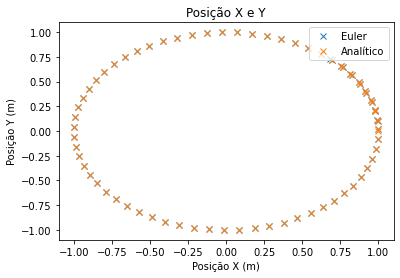

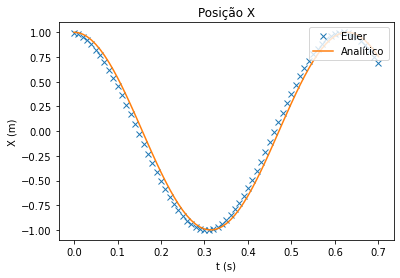

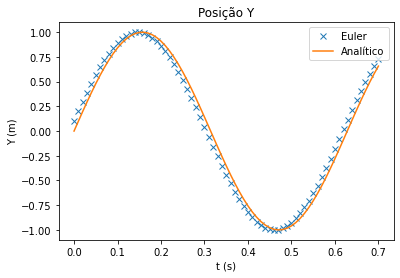

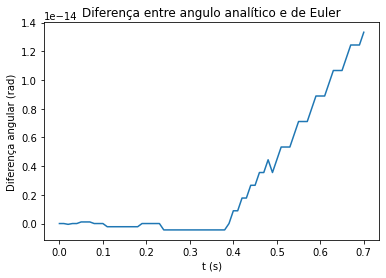

In [7]:
pyplot.figure(0)
pyplot.plot(Xe,Ye,label='Euler',linestyle='',marker='x')
pyplot.plot(Xa,Ya,label='Analítico')
pyplot.xlabel("Posição X (m)")
pyplot.ylabel("Posição Y (m)")
pyplot.title('Posição X e Y')
pyplot.legend(loc="upper right")
pyplot.show(block=False)

pyplot.figure(0)
pyplot.plot(tempo,Xe,label='Euler',linestyle='',marker='x')
pyplot.plot(tempo,Xa,label='Analítico')
pyplot.xlabel("t (s)")
pyplot.ylabel("X (m)")
pyplot.title('Posição X')
pyplot.legend(loc="upper right")
pyplot.show(block=False)

pyplot.figure(0)
pyplot.plot(tempo,Ye,label='Euler',linestyle='',marker='x')
pyplot.plot(tempo,Ya,label='Analítico')
pyplot.xlabel("t (s)")
pyplot.ylabel("Y (m)")
pyplot.title('Posição Y')
pyplot.legend(loc="upper right")
pyplot.show(block=False)


pyplot.figure(0)
pyplot.plot(tempo,diferenca)
pyplot.xlabel("t (s)")
pyplot.ylabel("Diferença angular (rad)")
pyplot.title('Diferença entre angulo analítico e de Euler')
pyplot.show(block=False)

# Animação

Temos a seguir a representação da trajetória e a sua simulação com o tempo da simulação analítica, o modelo com Euler seria implementado de maneira análoga.

In [0]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import os
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
import random
import requests
import os
from io import BytesIO

In [0]:
def simulaTrajeto(x,y, titleStr):


    plotSizeK=5
    plt.close()
    figSimula, axSimula = plt.subplots(1, 1, figsize = (plotSizeK, plotSizeK))

    axSimula.plot(x,y, 'r-*')
    plt.title(titleStr)


    plt.show()

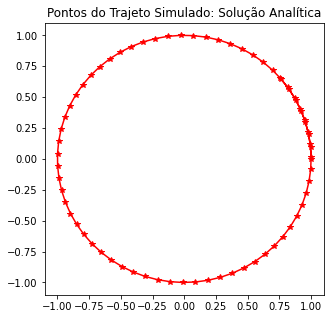

In [0]:
simulaTrajeto(Xa,Ya,'Pontos do Trajeto Simulado: Solução Analítica')

In [0]:
# initialization function: plot the background of each frame
def initAnimate():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    ind0 = i%len(xAnim)
    ind1 = (i+1)%len(xAnim)
    ind1 = ind0
    #ax.plot(xs,ys,'r*')
    line.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    return (line,)

def createAnimPlot(titleStr):
    plotSizeK=5

    figAnim, axAnim = plt.subplots(1, 1, figsize = (plotSizeK, plotSizeK))

    plt.title(titleStr)
    
    line, = axAnim.plot(Xa, Ya, 'r-*', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line)

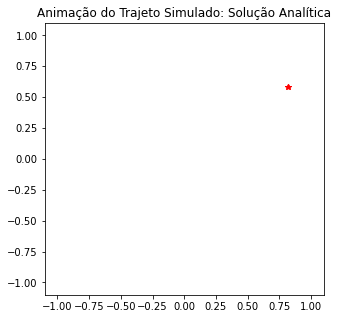

In [0]:
# Animacao: Solucao analitica

xAnim = Xa
yAnim = Ya

figAnim, axAnim, nFrames, line, = createAnimPlot('Animação do Trajeto Simulado: Solução Analítica')

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                             frames=nFrames, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

anim
#plt.close()
